In [228]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

dataset_dir = kagglehub.dataset_download("bobaaayoung/trafficvolumedatacsv")

# Find the CSV file within the directory
for filename in os.listdir(dataset_dir):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(dataset_dir, filename)
        break  # Stop after finding the first CSV file

print("Path to CSV file:", csv_file_path)

Path to CSV file: /root/.cache/kagglehub/datasets/bobaaayoung/trafficvolumedatacsv/versions/1/TrafficVolumeData.csv


In [229]:
df = pd.read_csv(csv_file_path)
df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,NaN,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,NaN,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,NaN,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,NaN,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,NaN,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33750 non-null  object 
 1   is_holiday           43 non-null     object 
 2   air_pollution_index  33750 non-null  int64  
 3   humidity             33750 non-null  int64  
 4   wind_speed           33750 non-null  int64  
 5   wind_direction       33750 non-null  int64  
 6   visibility_in_miles  33750 non-null  int64  
 7   dew_point            33750 non-null  int64  
 8   temperature          33750 non-null  float64
 9   rain_p_h             33750 non-null  float64
 10  snow_p_h             33750 non-null  float64
 11  clouds_all           33750 non-null  int64  
 12  weather_type         33750 non-null  object 
 13  weather_description  33750 non-null  object 
 14  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(4)
m

In [231]:
# Null values
null_values = df.isnull().sum()
print("Null values:\n", null_values)

Null values:
 date_time                  0
is_holiday             33707
air_pollution_index        0
humidity                   0
wind_speed                 0
wind_direction             0
visibility_in_miles        0
dew_point                  0
temperature                0
rain_p_h                   0
snow_p_h                   0
clouds_all                 0
weather_type               0
weather_description        0
traffic_volume             0
dtype: int64


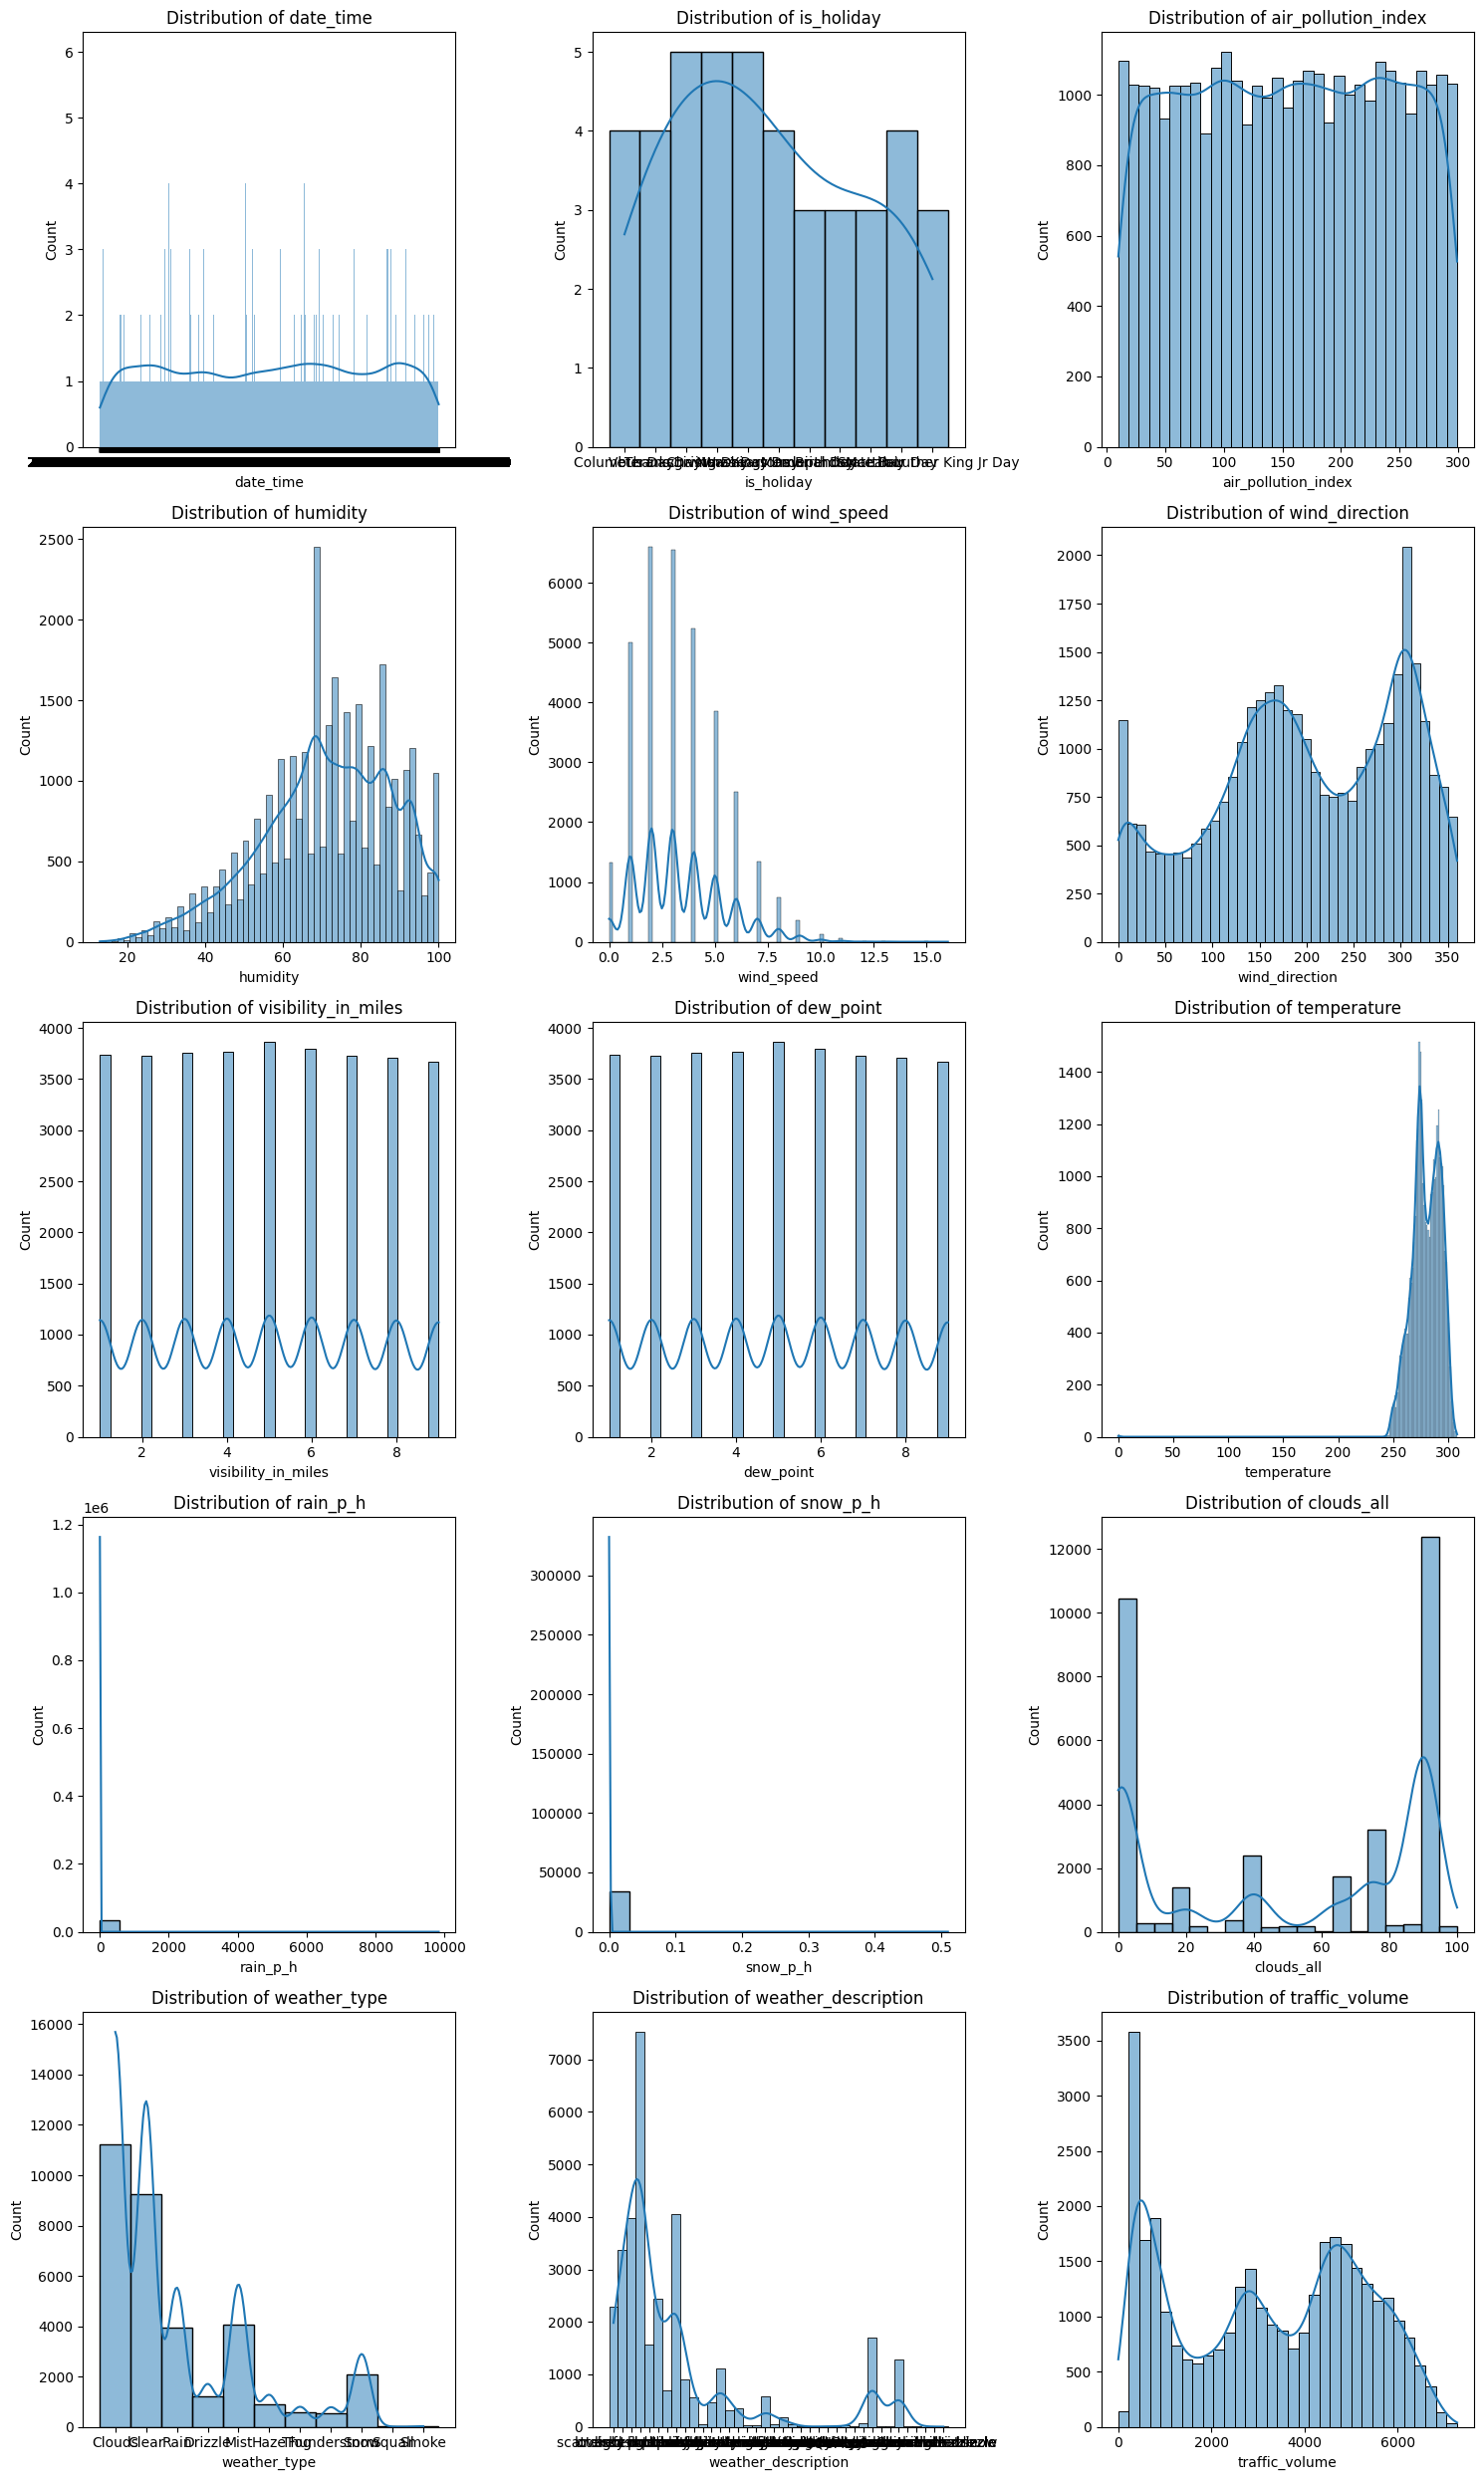

In [232]:
# plot the distribution of values of each column in one frame
import math

# Number of columns you want to plot
num_cols = len(df.columns)

# Calculate rows and columns for subplots (for example, 3 columns wide)
ncols = 3
nrows = math.ceil(num_cols / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))

# Flatten the axes array so we can iterate easily
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Hide any unused subplots if number of columns isn’t a perfect multiple of ncols
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [233]:
# List out all the unique values in the is_holiday column
unique_values = df['is_holiday'].unique()
print("Unique values in is_holiday column:", unique_values)

Unique values in is_holiday column: [nan 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day']


In [234]:
# Replace the NaN in is_holiday to "No"
df['is_holiday'].fillna('No', inplace=True)

<ipython-input-234-6556c8b017d0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['is_holiday'].fillna('No', inplace=True)


In [235]:
# Null values
null_values = df.isnull().sum()
print("Null values:\n", null_values)

# Unique values
unique_values = df.nunique()
print("\nUnique values:\n", unique_values)

# Numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns:", numerical_cols)

# Categorical columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()
print("Categorical columns:", categorical_cols)

Null values:
 date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
traffic_volume         0
dtype: int64

Unique values:
 date_time              28589
is_holiday                12
air_pollution_index      290
humidity                  88
wind_speed                17
wind_direction           361
visibility_in_miles        9
dew_point                  9
temperature             5611
rain_p_h                 353
snow_p_h                  12
clouds_all                60
weather_type              11
weather_description       38
traffic_volume          6462
dtype: int64
Numerical columns: ['air_pollution_index', 'humidity', 'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point', 'temperatu

In [236]:
# Convert the date_time column to datetime object
df_update_1 = df.copy()
df_update_1['date_time'] = pd.to_datetime(df['date_time'])

# Split date_time into two columns, date and time
df_update_1['date'] = df_update_1['date_time'].dt.date
df_update_1['time'] = df_update_1['date_time'].dt.time

# Bring the date and time columns to the front of the dataframe
df_update_1 = df_update_1[['date_time','date', 'time'] + [col for col in df_update_1.columns if col not in ['date_time', 'date', 'time']]]

In [237]:
df_update_1.head()

,date_time,date,time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,2012-10-02,09:00:00,No,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,2012-10-02,10:00:00,No,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,2012-10-02,11:00:00,No,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,2012-10-02,12:00:00,No,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,2012-10-02,13:00:00,No,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [238]:
# Create a function to categorize time into different periods
def categorize_time(time):
    if pd.isnull(time):
        return np.nan  # Handle missing values
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to the 'time' column
df_update_2 = df_update_1.copy()
df_update_2['time_of_day'] = df_update_2['time'].apply(categorize_time)

df_update_2 = df_update_2[['date_time','date', 'time','time_of_day'] + [col for col in df_update_1.columns if col not in ['date_time', 'date', 'time','time_of_day']]]

In [239]:
df_update_2.head()

,date_time,date,time,time_of_day,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,2012-10-02,09:00:00,Morning,No,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,2012-10-02,10:00:00,Morning,No,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,2012-10-02,11:00:00,Morning,No,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,2012-10-02,12:00:00,Afternoon,No,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,2012-10-02,13:00:00,Afternoon,No,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [240]:
df_update_3 = df_update_2.copy()
# Convert 'date' column to datetime objects before using .dt accessor
df_update_3['date'] = pd.to_datetime(df_update_3['date'])
df_update_3['day_of_week'] = df_update_3['date'].dt.day_name()

# Bring day_of_week next to date
cols = list(df_update_3.columns)
cols.remove('day_of_week')
cols.insert(cols.index('date') + 1, 'day_of_week')
df_update_3 = df_update_3[cols]

In [241]:
df_update_3.head()

,date_time,date,day_of_week,time,time_of_day,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,2012-10-02,Tuesday,09:00:00,Morning,No,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,2012-10-02,Tuesday,10:00:00,Morning,No,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,2012-10-02,Tuesday,11:00:00,Morning,No,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,2012-10-02,Tuesday,12:00:00,Afternoon,No,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,2012-10-02,Tuesday,13:00:00,Afternoon,No,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [242]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Create a copy of the DataFrame
df_scaled = df_update_3.copy() # Replace with any update level (But probably the latest one)
df_scaled.drop(columns=['date_time'], inplace=True)
# Apply standard scaling to numerical columns
scaler = StandardScaler()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

# Apply label encoding to categorical columns
categorical_cols = [col for col in categorical_cols if col not in ['date', 'time', 'date_time']]
for col in categorical_cols + ['day_of_week'] + ['time_of_day']:
    le = LabelEncoder()
    df_scaled[col] = le.fit_transform(df_scaled[col])

#more processing splitting data in day month year
df_scaled['day'] = df_scaled['date'].dt.day
df_scaled['month'] = df_scaled['date'].dt.month
df_scaled['year'] = df_scaled['date'].dt.year
df_scaled.drop(columns=['date'], inplace=True)

#encoding these values
for col in ['day', 'month', 'year']:
    le = LabelEncoder()
    df_scaled[col] = le.fit_transform(df_scaled[col])

#making time machine readable
df_scaled['time'] = pd.to_datetime(df_scaled['time'], format='%H:%M:%S')
df_scaled['time'] = (
    df_scaled['time'].dt.hour +
    df_scaled['time'].dt.minute / 60 +
    df_scaled['time'].dt.second / 3600
)

df_scaled.head()

,day_of_week,time,time_of_day,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,day,month,year
0,5,9.0,2,7,-0.404153,1.055720,-0.670405,1.297362,-1.552441,-1.552441,0.612030,-0.008384,-0.032546,-0.269063,1,24,1.157384,1,9,0
1,5,10.0,2,7,0.276572,-0.249763,-0.183967,1.307378,-1.552441,-1.552441,0.692536,-0.008384,-0.032546,0.631348,1,2,0.640677,1,9,0
2,5,11.0,2,7,-0.499693,-0.309103,-0.183967,1.297362,-1.163334,-1.163334,0.708936,-0.008384,-0.032546,1.017238,1,19,0.766716,1,9,0
3,5,12.0,0,7,-1.610349,-0.309103,-0.183967,1.297362,0.003989,0.003989,0.749934,-0.008384,-0.032546,1.017238,1,19,0.896771,1,9,0
4,5,13.0,0,7,1.506654,-0.368443,-0.183967,1.297362,0.782204,0.782204,0.825223,-0.008384,-0.032546,0.631348,1,2,0.842539,1,9,0


In [243]:
# check unique values
for col in df_scaled.columns:
    print(f"{col}: {df_scaled[col].nunique()}")

day_of_week: 7
time: 24
time_of_day: 4
is_holiday: 12
air_pollution_index: 290
humidity: 88
wind_speed: 17
wind_direction: 361
visibility_in_miles: 9
dew_point: 9
temperature: 5611
rain_p_h: 353
snow_p_h: 12
clouds_all: 60
weather_type: 11
weather_description: 38
traffic_volume: 6462
day: 31
month: 12
year: 6


In [244]:
# weekend vs. weekday
df_scaled['day_of_week'] = df_scaled['day_of_week'].apply(lambda x: 1 if x in [5,6] else 0)

In [245]:
# check unique values
for col in df_scaled.columns:
    print(f"{col}: {df_scaled[col].nunique()}")

day_of_week: 2
time: 24
time_of_day: 4
is_holiday: 12
air_pollution_index: 290
humidity: 88
wind_speed: 17
wind_direction: 361
visibility_in_miles: 9
dew_point: 9
temperature: 5611
rain_p_h: 353
snow_p_h: 12
clouds_all: 60
weather_type: 11
weather_description: 38
traffic_volume: 6462
day: 31
month: 12
year: 6


In [246]:
# drop the correlated 'time' column and use only 'time_of_day'
df_scaled.drop(columns=['time'], inplace=True)
df_scaled.head()

,day_of_week,time_of_day,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,day,month,year
0,1,2,7,-0.404153,1.055720,-0.670405,1.297362,-1.552441,-1.552441,0.612030,-0.008384,-0.032546,-0.269063,1,24,1.157384,1,9,0
1,1,2,7,0.276572,-0.249763,-0.183967,1.307378,-1.552441,-1.552441,0.692536,-0.008384,-0.032546,0.631348,1,2,0.640677,1,9,0
2,1,2,7,-0.499693,-0.309103,-0.183967,1.297362,-1.163334,-1.163334,0.708936,-0.008384,-0.032546,1.017238,1,19,0.766716,1,9,0
3,1,0,7,-1.610349,-0.309103,-0.183967,1.297362,0.003989,0.003989,0.749934,-0.008384,-0.032546,1.017238,1,19,0.896771,1,9,0
4,1,0,7,1.506654,-0.368443,-0.183967,1.297362,0.782204,0.782204,0.825223,-0.008384,-0.032546,0.631348,1,2,0.842539,1,9,0


In [247]:
# check unique values
for col in df_scaled.columns:
    print(f"{col}: {df_scaled[col].nunique()}")

day_of_week: 2
time_of_day: 4
is_holiday: 12
air_pollution_index: 290
humidity: 88
wind_speed: 17
wind_direction: 361
visibility_in_miles: 9
dew_point: 9
temperature: 5611
rain_p_h: 353
snow_p_h: 12
clouds_all: 60
weather_type: 11
weather_description: 38
traffic_volume: 6462
day: 31
month: 12
year: 6


In [248]:
# drop the day column
df_scaled.drop(columns=['day'], inplace=True)
df_scaled.head()

,day_of_week,time_of_day,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,month,year
0,1,2,7,-0.404153,1.055720,-0.670405,1.297362,-1.552441,-1.552441,0.612030,-0.008384,-0.032546,-0.269063,1,24,1.157384,9,0
1,1,2,7,0.276572,-0.249763,-0.183967,1.307378,-1.552441,-1.552441,0.692536,-0.008384,-0.032546,0.631348,1,2,0.640677,9,0
2,1,2,7,-0.499693,-0.309103,-0.183967,1.297362,-1.163334,-1.163334,0.708936,-0.008384,-0.032546,1.017238,1,19,0.766716,9,0
3,1,0,7,-1.610349,-0.309103,-0.183967,1.297362,0.003989,0.003989,0.749934,-0.008384,-0.032546,1.017238,1,19,0.896771,9,0
4,1,0,7,1.506654,-0.368443,-0.183967,1.297362,0.782204,0.782204,0.825223,-0.008384,-0.032546,0.631348,1,2,0.842539,9,0


In [249]:
# check unique values
for col in df_scaled.columns:
    print(f"{col}: {df_scaled[col].nunique()}")

day_of_week: 2
time_of_day: 4
is_holiday: 12
air_pollution_index: 290
humidity: 88
wind_speed: 17
wind_direction: 361
visibility_in_miles: 9
dew_point: 9
temperature: 5611
rain_p_h: 353
snow_p_h: 12
clouds_all: 60
weather_type: 11
weather_description: 38
traffic_volume: 6462
month: 12
year: 6


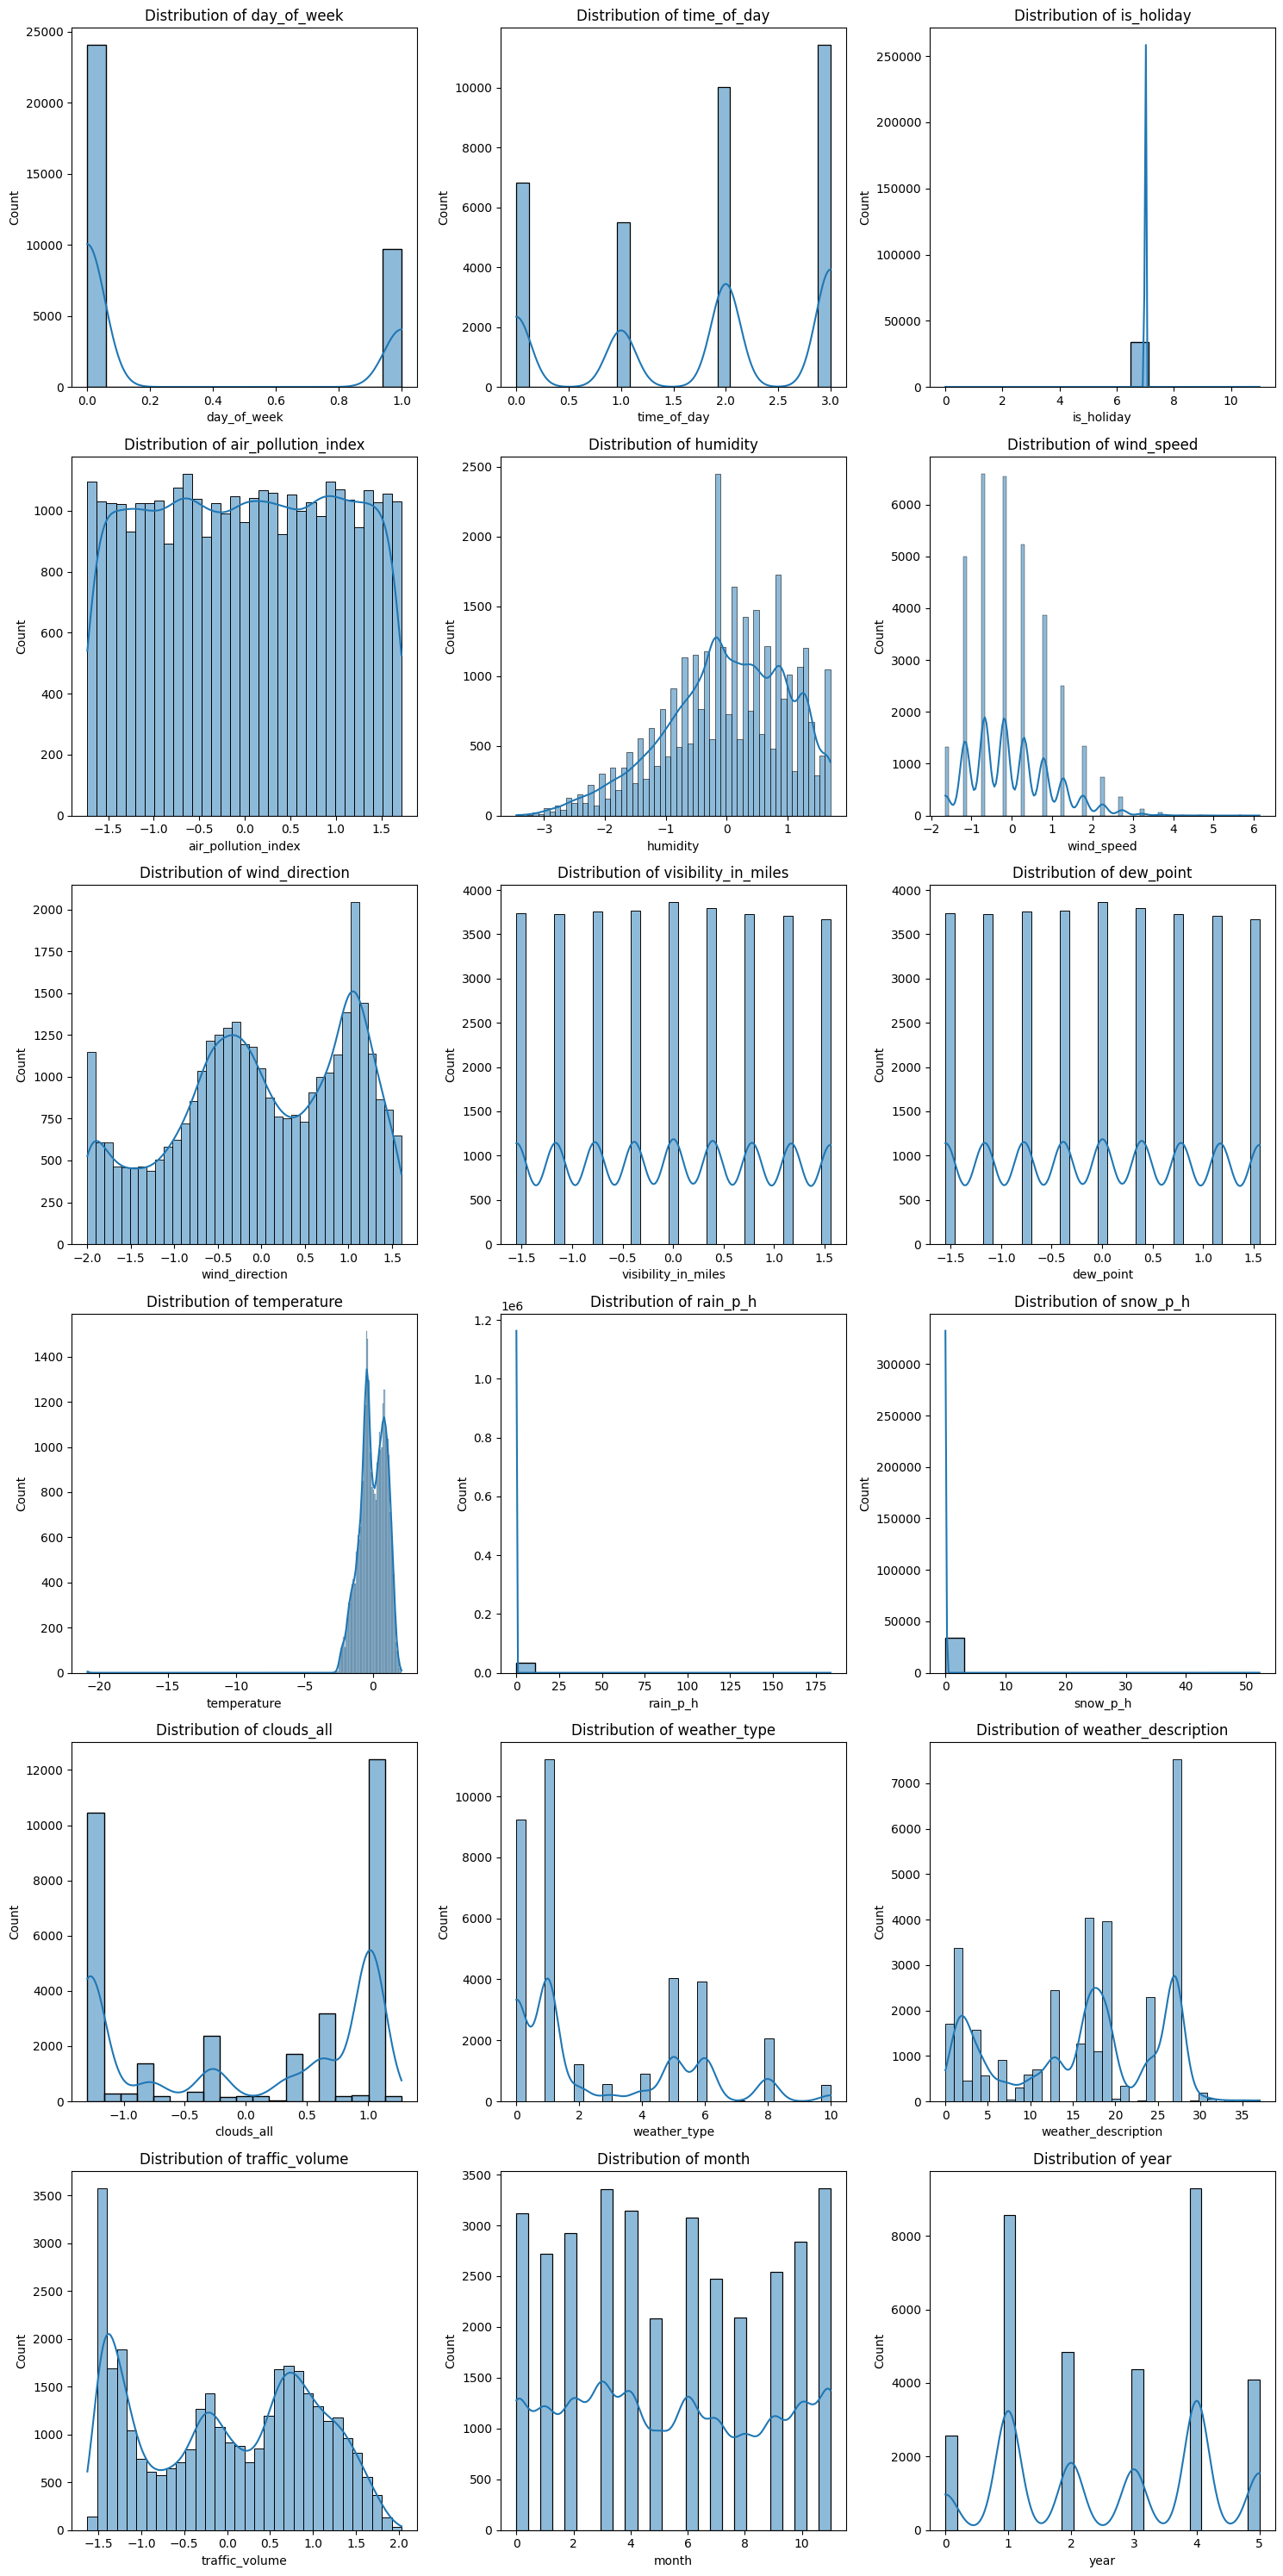

In [250]:
# plot the distribution of values of each column in one frame
import math

# Number of columns you want to plot
num_cols = len(df_scaled.columns)

# Calculate rows and columns for subplots (for example, 3 columns wide)
ncols = 3
nrows = math.ceil(num_cols / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))

# Flatten the axes array so we can iterate easily
axes = axes.flatten()

for i, col in enumerate(df_scaled.columns):
    sns.histplot(df_scaled[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Hide any unused subplots if number of columns isn’t a perfect multiple of ncols
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [264]:
from sklearn.preprocessing import PowerTransformer

# transform the humidity to be less skewed
pt = PowerTransformer(method='yeo-johnson')

# rename
df_scaled['humidity_trans'] = pt.fit_transform(df_scaled[['humidity']])


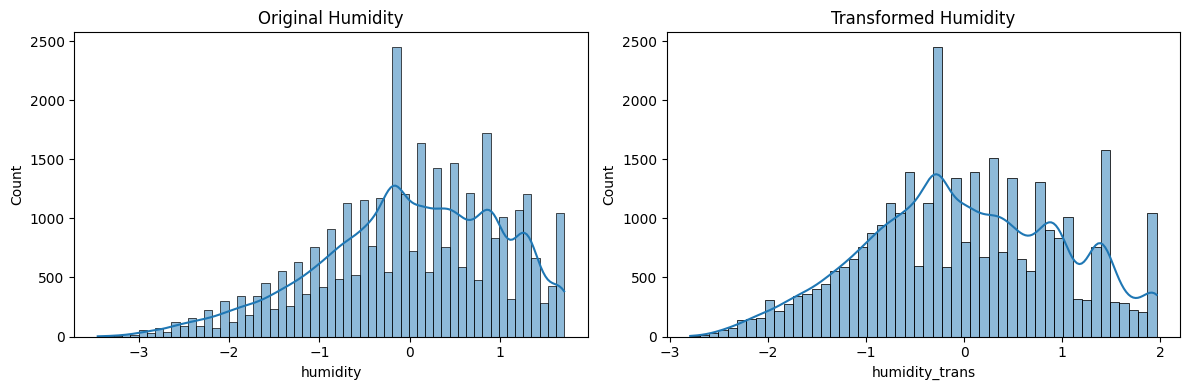

In [265]:
# the normalization result is not obvious, so it is dropped.
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot 'humidity'
sns.histplot(df_scaled['humidity'], ax=axes[0], kde=True)
axes[0].set_title('Original Humidity')

# Plot 'humidity_trans'
sns.histplot(df_scaled['humidity_trans'], ax=axes[1], kde=True)
axes[1].set_title('Transformed Humidity')

plt.tight_layout()
plt.show()

In [266]:
df_scaled.drop(columns=['humidity_trans'], inplace=True)
# check unique values
for col in df_scaled.columns:
    print(f"{col}: {df_scaled[col].nunique()}")


day_of_week: 2
time_of_day: 4
is_holiday: 12
air_pollution_index: 290
humidity: 88
wind_speed: 17
wind_direction: 361
visibility_in_miles: 9
dew_point: 9
temperature: 5611
rain_p_h: 353
snow_p_h: 12
clouds_all: 60
weather_type: 11
weather_description: 38
traffic_volume: 6462
month: 12
year: 6


In [267]:
df_scaled.to_csv("traffic_data_preprocessed_v2.csv", index=False)

In [268]:
# import the csv file
df_processed = pd.read_csv("traffic_data_preprocessed_v2.csv")
df_processed.head()

,day_of_week,time_of_day,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,month,year
0,1,2,7,-0.404153,1.055720,-0.670405,1.297362,-1.552441,-1.552441,0.612030,-0.008384,-0.032546,-0.269063,1,24,1.157384,9,0
1,1,2,7,0.276572,-0.249763,-0.183967,1.307378,-1.552441,-1.552441,0.692536,-0.008384,-0.032546,0.631348,1,2,0.640677,9,0
2,1,2,7,-0.499693,-0.309103,-0.183967,1.297362,-1.163334,-1.163334,0.708936,-0.008384,-0.032546,1.017238,1,19,0.766716,9,0
3,1,0,7,-1.610349,-0.309103,-0.183967,1.297362,0.003989,0.003989,0.749934,-0.008384,-0.032546,1.017238,1,19,0.896771,9,0
4,1,0,7,1.506654,-0.368443,-0.183967,1.297362,0.782204,0.782204,0.825223,-0.008384,-0.032546,0.631348,1,2,0.842539,9,0


# Linear Regression

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_processed is your DataFrame
# Separate features and target
X = df_processed.drop(columns=["traffic_volume"]).values
y = df_processed["traffic_volume"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Intercept: 0.9460655496675655
Coefficients: [ 2.09046262e-01 -6.13457668e-01  3.14500462e-02 -2.79877360e-04
 -3.46042330e-03  9.78138491e-03  9.65319348e-03 -1.14333354e-03
 -1.14333354e-03  4.25555876e-02  3.74603126e-03 -2.27204703e-03
  1.04593660e-02 -7.74274151e-03 -2.45638131e-03 -1.00817516e-02
 -9.77029367e-03]
Mean Squared Error (MSE): 0.4982058124905089
R-squared: 0.5052559854530478


# Ridge Regression

In [273]:
from sklearn.linear_model import Ridge, Lasso

ridge_model = Ridge(alpha=10.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

print("Intercept:", ridge_model.intercept_)
print("Coefficients:", ridge_model.coef_)
print("Mean Squared Error:", mean_squared_error(y_test, ridge_pred))
print("R-squared:", r2_score(y_test, ridge_pred))

Intercept: 0.9496814919260536
Coefficients: [ 2.08662631e-01 -6.13272820e-01  3.09039617e-02 -2.81125757e-04
 -3.45267089e-03  9.77995827e-03  9.65749780e-03 -1.14291211e-03
 -1.14291211e-03  4.25666633e-02  3.74510518e-03 -2.26798051e-03
  1.04762861e-02 -7.74800873e-03 -2.45710549e-03 -1.00813290e-02
 -9.76630179e-03]
Mean Squared Error: 0.4982065943885564
R-squared: 0.5052552089880422


In [289]:
lasso_model = Lasso(alpha=.001)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

print("Intercept:", lasso_model.intercept_)
print("Coefficients:", lasso_model.coef_)
print("Mean Squared Error:", mean_squared_error(y_test, lasso_pred))
print("R-squared:", r2_score(y_test, lasso_pred))

Intercept: 1.1641497116039903
Coefficients: [ 2.04116535e-01 -6.12941212e-01  0.00000000e+00 -0.00000000e+00
 -2.60750536e-03  9.00317190e-03  8.82019437e-03 -1.34211344e-03
 -1.05260768e-18  4.11655098e-02  2.97447818e-03 -1.11440057e-03
  8.80113581e-03 -7.39516173e-03 -2.49976026e-03 -9.94111023e-03
 -9.16974919e-03]
Mean Squared Error: 0.49816873420305974
R-squared: 0.5052928061009111


In [290]:
import numpy as np

# 1. Store the column names in the same order as X
feature_names = df_scaled.drop(columns=['traffic_volume']).columns

# 2. Get the Lasso coefficients
coeffs = lasso_model.coef_

# 3. Create a boolean mask for coefficients close to zero
zero_coef_mask = np.isclose(coeffs, 0.0)

# 4. Use the mask to index into feature_names
zero_coef_columns = feature_names[zero_coef_mask]

print("Columns with coefficients close to 0:", zero_coef_columns)

Columns with coefficients close to 0: Index(['is_holiday', 'air_pollution_index', 'dew_point'], dtype='object')


In [291]:
# drop the columns ['is_holiday', 'air_pollution_index', 'dew_point'] from df_processed
df_processed.drop(columns=['is_holiday', 'air_pollution_index', 'dew_point'], inplace=True)

In [292]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_processed is your DataFrame
# Separate features and target
X = df_processed.drop(columns=["traffic_volume"]).values
y = df_processed["traffic_volume"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Intercept: 1.1664267105882966
Coefficients: [ 0.20905996 -0.61350279 -0.00342884  0.00976396  0.00966927 -0.00233081
  0.04258156  0.00374623 -0.00227015  0.01050354 -0.0077671  -0.00245598
 -0.010103   -0.00977729]
Mean Squared Error (MSE): 0.4982632876273653
R-squared: 0.5051989096838937


In [293]:
# save a reduced version of csv without ['is_holiday', 'air_pollution_index', 'dew_point']
df_processed.to_csv("traffic_data_preprocessed_v2_reduced.csv", index=False)